# Xarxa neuronal

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform as sp_rand
from scipy.stats import randint
from time import time
from sklearn import preprocessing

Using TensorFlow backend.


## Consum diari total multivariate one-step

In [16]:
daily=pd.read_csv('C:/Users/Laura/Desktop/Smart meters London/workspace R/Dades netes/Final/daily_agr_mitjanaLlarPerDia.csv')
daily.head(5)

,date,apparentTemperatureMax,sunsetTimeHour,weekday,season,cloudCover,humidity,visibility,month,energy_sum
0,2013-01-16,-0.15,16,3,winter,0.48,0.91,4.12,1,13.147536
1,2013-01-20,-0.46,16,7,winter,0.85,0.91,5.10,1,15.021900
2,2013-01-10,2.36,16,4,winter,0.70,0.94,5.21,1,12.066789
3,2013-01-06,6.98,16,7,winter,0.67,0.96,5.50,1,12.422263
4,2012-01-31,1.13,16,2,winter,0.55,0.84,5.62,1,13.890518


In [17]:
#Ens quedem amb date i energy_sum, ordenem valors per data i resetejem index
daily_dia=daily[['date','energy_sum','apparentTemperatureMax','humidity']].sort_values(by=['date']).reset_index()
daily_dia.head(5)


,index,date,energy_sum,apparentTemperatureMax,humidity
0,677,2011-11-23,6.952692,10.36,0.93
1,691,2011-11-24,8.536480,12.93,0.89
2,713,2011-11-25,9.499781,13.03,0.79
3,728,2011-11-26,10.267707,12.96,0.81
4,729,2011-11-27,10.850805,13.54,0.72


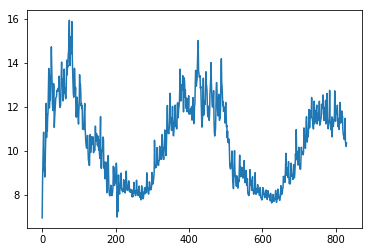

In [16]:
plt.plot(daily_dia )

In [18]:

daily_dia['y+1']=daily_dia['energy_sum'].shift(-1)
daily_dia['y+2']=daily_dia['energy_sum'].shift(-2)
daily_dia['y+3']=daily_dia['energy_sum'].shift(-3)
daily_dia['y+4']=daily_dia['energy_sum'].shift(-4)
daily_dia['y+5']=daily_dia['energy_sum'].shift(-5)
daily_dia['y+6']=daily_dia['energy_sum'].shift(-6)
daily_dia['y+7']=daily_dia['energy_sum'].shift(-7)
daily_dia['y+8']=daily_dia['energy_sum'].shift(-8)
daily_dia['y+9']=daily_dia['energy_sum'].shift(-9)
daily_dia['y+10']=daily_dia['energy_sum'].shift(-10)
daily_dia['y+11']=daily_dia['energy_sum'].shift(-11)
daily_dia['y+12']=daily_dia['energy_sum'].shift(-12)
daily_dia['y+13']=daily_dia['energy_sum'].shift(-13)
daily_dia['y+14']=daily_dia['energy_sum'].shift(-14)
daily_dia['y+15']=daily_dia['energy_sum'].shift(-15)
daily_dia['y+16']=daily_dia['energy_sum'].shift(-16)
daily_dia['y+17']=daily_dia['energy_sum'].shift(-17)
daily_dia['y+18']=daily_dia['energy_sum'].shift(-18)
daily_dia['y+19']=daily_dia['energy_sum'].shift(-19)
daily_dia['y+20']=daily_dia['energy_sum'].shift(-20)
daily_dia['y+21']=daily_dia['energy_sum'].shift(-21)
daily_dia['y+22']=daily_dia['energy_sum'].shift(-22)
daily_dia['y+23']=daily_dia['energy_sum'].shift(-23)
daily_dia['y+24']=daily_dia['energy_sum'].shift(-24)
daily_dia['y+25']=daily_dia['energy_sum'].shift(-25)
daily_dia['y+26']=daily_dia['energy_sum'].shift(-26)
daily_dia['y+27']=daily_dia['energy_sum'].shift(-27)
daily_dia['y+28']=daily_dia['energy_sum'].shift(-28)
daily_dia['y+29']=daily_dia['energy_sum'].shift(-29)
daily_dia['y+30']=daily_dia['energy_sum'].shift(-30)









daily_dia['t-1']=daily_dia['energy_sum'].shift(1)
daily_dia['t-2']=daily_dia['energy_sum'].shift(2)
daily_dia['t-3']=daily_dia['energy_sum'].shift(3)
daily_dia['t-4']=daily_dia['energy_sum'].shift(4)
daily_dia['t-5']=daily_dia['energy_sum'].shift(5)
daily_dia['t-6']=daily_dia['energy_sum'].shift(6)
daily_dia['t-7']=daily_dia['energy_sum'].shift(7)
daily_dia['t-8']=daily_dia['energy_sum'].shift(8)
daily_dia['t-9']=daily_dia['energy_sum'].shift(9)
daily_dia['t-10']=daily_dia['energy_sum'].shift(10)
daily_dia['t-11']=daily_dia['energy_sum'].shift(11)
daily_dia['t-12']=daily_dia['energy_sum'].shift(12)
daily_dia['t-13']=daily_dia['energy_sum'].shift(13)
daily_dia['t-14']=daily_dia['energy_sum'].shift(14)


daily_dia['temp(t-1)']=daily_dia['apparentTemperatureMax'].shift(1)
daily_dia['temp(t-2)']=daily_dia['apparentTemperatureMax'].shift(2)
daily_dia['temp(t-3)']=daily_dia['apparentTemperatureMax'].shift(3)
daily_dia['temp(t-4)']=daily_dia['apparentTemperatureMax'].shift(4)
daily_dia['temp(t-5)']=daily_dia['apparentTemperatureMax'].shift(5)
daily_dia['temp(t-6)']=daily_dia['apparentTemperatureMax'].shift(6)
daily_dia['temp(t-7)']=daily_dia['apparentTemperatureMax'].shift(7)
daily_dia['temp(t-8)']=daily_dia['apparentTemperatureMax'].shift(8)
daily_dia['temp(t-9)']=daily_dia['apparentTemperatureMax'].shift(9)
daily_dia['temp(t-10)']=daily_dia['apparentTemperatureMax'].shift(10)
daily_dia['temp(t-11)']=daily_dia['apparentTemperatureMax'].shift(11)
daily_dia['temp(t-12)']=daily_dia['apparentTemperatureMax'].shift(12)
daily_dia['temp(t-13)']=daily_dia['apparentTemperatureMax'].shift(13)
daily_dia['temp(t-14)']=daily_dia['apparentTemperatureMax'].shift(14)


daily_dia['humidity(t-1)']=daily_dia['humidity'].shift(1)
daily_dia['humidity(t-2)']=daily_dia['humidity'].shift(2)
daily_dia['humidity(t-3)']=daily_dia['humidity'].shift(3)
daily_dia['humidity(t-4)']=daily_dia['humidity'].shift(4)
daily_dia['humidity(t-5)']=daily_dia['humidity'].shift(5)
daily_dia['humidity(t-6)']=daily_dia['humidity'].shift(6)
daily_dia['humidity(t-7)']=daily_dia['humidity'].shift(7)
daily_dia['humidity(t-8)']=daily_dia['humidity'].shift(8)
daily_dia['humidity(t-9)']=daily_dia['humidity'].shift(9)
daily_dia['humidity(t-10)']=daily_dia['humidity'].shift(10)
daily_dia['humidity(t-11)']=daily_dia['humidity'].shift(11)
daily_dia['humidity(t-12)']=daily_dia['humidity'].shift(12)
daily_dia['humidity(t-13)']=daily_dia['humidity'].shift(13)
daily_dia['humidity(t-14)']=daily_dia['humidity'].shift(14)





daily_dia

,index,date,energy_sum,apparentTemperatureMax,humidity,y+1,y+2,y+3,y+4,y+5,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
0,677,2011-11-23,6.952692,10.36,0.93,8.536480,9.499781,10.267707,10.850805,9.103382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,691,2011-11-24,8.536480,12.93,0.89,9.499781,10.267707,10.850805,9.103382,9.274873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,713,2011-11-25,9.499781,13.03,0.79,10.267707,10.850805,9.103382,9.274873,8.813513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,728,2011-11-26,10.267707,12.96,0.81,10.850805,9.103382,9.274873,8.813513,9.227707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,729,2011-11-27,10.850805,13.54,0.72,9.103382,9.274873,8.813513,9.227707,10.145910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,704,2011-11-28,9.103382,12.58,0.86,9.274873,8.813513,9.227707,10.145910,10.780273,...,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,718,2011-11-29,9.274873,13.47,0.82,8.813513,9.227707,10.145910,10.780273,12.163127,...,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,727,2011-11-30,8.813513,11.87,0.78,9.227707,10.145910,10.780273,12.163127,10.609714,...,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,778,2011-12-01,9.227707,12.15,0.82,10.145910,10.780273,12.163127,10.609714,11.673417,...,0.81,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN
9,773,2011-12-02,10.145910,5.33,0.87,10.780273,12.163127,10.609714,11.673417,10.889362,...,0.72,0.81,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN


In [19]:
#Ens quedem amb energies i temperatures 
#No agafem apparent temperature max ja que quan fem la predicció representa que no ho sabem
daily_dia=daily_dia.drop(['index','date','apparentTemperatureMax', 'humidity'], axis=1)
#daily_dia=daily_dia[['energy_sum','t-1','t-2','t-3','t-4','t-5','t-6','t-7','t-8','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)']]
daily_dia.head(5)


,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
0,6.952692,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,12.163127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,12.163127,10.609714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,12.163127,10.609714,11.673417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Eliminem les 14 primeres files ja que contenen NaN (valors buits)

daily_dia=daily_dia.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
daily_dia=daily_dia.drop([829,828,827,826,825,824,823, 822,821,820,819,818,817,816,815,814,813,812,811,810,809,808,807,806,805,804,803,802,801,800])
daily_dia.tail(5)

,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
795,11.409880,11.620778,12.729659,11.753871,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,...,0.80,0.83,0.87,0.83,0.90,0.81,0.83,0.90,0.81,0.85
796,11.620778,12.729659,11.753871,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,11.280011,...,0.89,0.80,0.83,0.87,0.83,0.90,0.81,0.83,0.90,0.81
797,12.729659,11.753871,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,11.280011,11.095584,...,0.89,0.89,0.80,0.83,0.87,0.83,0.90,0.81,0.83,0.90
798,11.753871,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,11.280011,11.095584,11.415105,...,0.87,0.89,0.89,0.80,0.83,0.87,0.83,0.90,0.81,0.83
799,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,11.280011,11.095584,11.415105,11.445403,...,0.82,0.87,0.89,0.89,0.80,0.83,0.87,0.83,0.90,0.81


In [21]:
len(daily_dia)


786

In [22]:

#normalitzem
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
daily_dia_norm=scaler.fit_transform(daily_dia)



In [23]:


#Seleccionem dades per test i train
y_daily=daily_dia_norm[:,0:31]

X_daily=daily_dia_norm[:,31:80]

#y_daily=daily_dia['energy_sum']
#X_daily=daily_dia.drop(['energy_sum'], axis='columns')



#Reshape de [samples,timesteps] a [samples,timesteps,features]

#Enlloc de 14 features en son 7 de una feature i 7 duna altre
X_daily=np.reshape(X_daily, (X_daily.shape[0], 14,3))



In [24]:
# definim model
import tensorflow as tf
model =Sequential()
model.add(LSTM(50, activation='relu', input_shape=(14, 3)))
model.add(Dense(30))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [25]:
import math
from sklearn.metrics import mean_squared_error

#Walk forward per test i train
minim=100
n_train=465
lenght=len(daily_dia)

llista_evaluate=list()
llista_prediccions=list()
llista_preditrain=list()
llista_scores=list()
llista_scoretrain=list()
sumScores=0

for i in range(n_train,lenght):
    minim=minim+1
    X_train,X_test= X_daily[minim:i],X_daily[i:i+1]
    y_train,y_test= y_daily[minim:i],y_daily[i:i+1]

    #fem fit al model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #mostrem score per cada model
    score=model.evaluate(X_test,y_test,verbose=0)
    llista_evaluate.append(score)
    
    #Predim per cadascun
    preditest=model.predict(X_test)
    llista_prediccions.append(preditest)
    
    preditrain=model.predict(X_train)
    llista_preditrain.append(preditrain)
    
    trainScore = math.sqrt(mean_squared_error(y_train, preditrain))
    llista_scoretrain.append(trainScore )
    

    testScore = math.sqrt(mean_squared_error(y_test, preditest))
    llista_scores.append(testScore)
   
    sumScores=sumScores+testScore

In [26]:
#Dividim la suma de scores de test entre el nombre de prediccions per obtenir la mitjana
sumScores/(lenght-n_train)

0.06892668040865255

In [27]:
#Fem llista amb les prediccions
llista_p=list()
for i in range(len(llista_prediccions)):
    llista_p.append(llista_prediccions[i].tolist())
    
llista_p

[[[0.5271562337875366,
   0.5230936408042908,
   0.519335150718689,
   0.5157985091209412,
   0.517134964466095,
   0.5033103227615356,
   0.5165379047393799,
   0.5125564932823181,
   0.5241408944129944,
   0.5291150212287903,
   0.5090453624725342,
   0.5070761442184448,
   0.5145764946937561,
   0.5227232575416565,
   0.5132498145103455,
   0.521952748298645,
   0.5137225389480591,
   0.5283269286155701,
   0.5130143761634827,
   0.5035643577575684,
   0.5158979892730713,
   0.5147379040718079,
   0.5178691148757935,
   0.5001479387283325,
   0.5169596076011658,
   0.5225997567176819,
   0.5187907218933105,
   0.5121550559997559,
   0.5061119198799133,
   0.5154060125350952]],
 [[0.4852393567562103,
   0.4851992130279541,
   0.4886135458946228,
   0.47953569889068604,
   0.4910784363746643,
   0.483172744512558,
   0.48505181074142456,
   0.47368863224983215,
   0.482167512178421,
   0.482192724943161,
   0.47883790731430054,
   0.49863937497138977,
   0.4902525544166565,
   0.50334

In [29]:
#Fem llista amb la predicció de només el dia següent
llista_p0=list()
for i in range(len(llista_p)):
    llista_p0.append(llista_p[i][0][0])

#Fem llista amb la predicció de 2 dies
llista_p1=list()
for i in range(len(llista_p)):
    llista_p1.append(llista_p[i][0][1])

#Altres dies

llista_p2=list()
for i in range(len(llista_p)):
    llista_p2.append(llista_p[i][0][2])
    
llista_p3=list()
for i in range(len(llista_p)):
    llista_p3.append(llista_p[i][0][3])
    
llista_p4=list()
for i in range(len(llista_p)):
    llista_p4.append(llista_p[i][0][4])
    
llista_p5=list()
for i in range(len(llista_p)):
    llista_p5.append(llista_p[i][0][5])
    
llista_p6=list()
for i in range(len(llista_p)):
    llista_p6.append(llista_p[i][0][6])

llista_p7=list()
for i in range(len(llista_p)):
    llista_p7.append(llista_p[i][0][7])

llista_p8=list()
for i in range(len(llista_p)):
    llista_p8.append(llista_p[i][0][8])
    
llista_p9=list()
for i in range(len(llista_p)):
    llista_p9.append(llista_p[i][0][9])
    
llista_p10=list()
for i in range(len(llista_p)):
    llista_p10.append(llista_p[i][0][10])
    
llista_p11=list()
for i in range(len(llista_p)):
    llista_p11.append(llista_p[i][0][11])
    
llista_p12=list()
for i in range(len(llista_p)):
    llista_p12.append(llista_p[i][0][12])
    
llista_p13=list()
for i in range(len(llista_p)):
    llista_p13.append(llista_p[i][0][13])
    
llista_p14=list()
for i in range(len(llista_p)):
    llista_p14.append(llista_p[i][0][14])
    
llista_p15=list()
for i in range(len(llista_p)):
    llista_p15.append(llista_p[i][0][15])
    
llista_p16=list()
for i in range(len(llista_p)):
    llista_p16.append(llista_p[i][0][16])
    
llista_p17=list()
for i in range(len(llista_p)):
    llista_p17.append(llista_p[i][0][17])
    
llista_p18=list()
for i in range(len(llista_p)):
    llista_p18.append(llista_p[i][0][18])
    
llista_p19=list()
for i in range(len(llista_p)):
    llista_p19.append(llista_p[i][0][19])
    
llista_p20=list()
for i in range(len(llista_p)):
    llista_p20.append(llista_p[i][0][20])
    
llista_p21=list()
for i in range(len(llista_p)):
    llista_p21.append(llista_p[i][0][21])
    
llista_p22=list()
for i in range(len(llista_p)):
    llista_p22.append(llista_p[i][0][22])
    
llista_p23=list()
for i in range(len(llista_p)):
    llista_p23.append(llista_p[i][0][23])
    
    llista_p24=list()
for i in range(len(llista_p)):
    llista_p24.append(llista_p[i][0][24])
    
llista_p25=list()
for i in range(len(llista_p)):
    llista_p25.append(llista_p[i][0][25])
    
llista_p26=list()
for i in range(len(llista_p)):
    llista_p26.append(llista_p[i][0][26])
    
llista_p27=list()
for i in range(len(llista_p)):
    llista_p27.append(llista_p[i][0][27])
    
llista_p28=list()
for i in range(len(llista_p)):
    llista_p28.append(llista_p[i][0][28])
    
llista_p29=list()
for i in range(len(llista_p)):
    llista_p29.append(llista_p[i][0][29])
    


In [31]:
score0=math.sqrt(mean_squared_error(y_daily[n_train:lenght,0], llista_p0))
print("Error predicció 1 dia següent: {}".format(score0))
score1=math.sqrt(mean_squared_error(y_daily[n_train:lenght,1], llista_p1))
print("Error predicció 2 dia següent: {}".format(score1))
score2=math.sqrt(mean_squared_error(y_daily[n_train:lenght,2], llista_p2))
print("Error predicció 3 dia següent: {}".format(score2))
score3=math.sqrt(mean_squared_error(y_daily[n_train:lenght,3], llista_p3))
print("Error predicció 4 dia següent: {}".format(score3))
score4=math.sqrt(mean_squared_error(y_daily[n_train:lenght,4], llista_p4))
print("Error predicció 5 dia següent: {}".format(score4))
score5=math.sqrt(mean_squared_error(y_daily[n_train:lenght,5], llista_p5))
print("Error predicció 6 dia següent: {}".format(score5))
score6=math.sqrt(mean_squared_error(y_daily[n_train:lenght,6], llista_p6))
print("Error predicció 7 dia següent: {}".format(score6))
score7=math.sqrt(mean_squared_error(y_daily[n_train:lenght,7], llista_p7))
print("Error predicció 8 dia següent: {}".format(score7))
score8=math.sqrt(mean_squared_error(y_daily[n_train:lenght,8], llista_p8))
print("Error predicció 9 dia següent: {}".format(score8))
score9=math.sqrt(mean_squared_error(y_daily[n_train:lenght,9], llista_p9))
print("Error predicció 10 dia següent: {}".format(score9))
score10=math.sqrt(mean_squared_error(y_daily[n_train:lenght,10], llista_p10))
print("Error predicció 11 dia següent: {}".format(score10))
score11=math.sqrt(mean_squared_error(y_daily[n_train:lenght,11], llista_p11))
print("Error predicció 12 dia següent: {}".format(score11))
score12=math.sqrt(mean_squared_error(y_daily[n_train:lenght,12], llista_p12))
print("Error predicció 13 dia següent: {}".format(score12))
score13=math.sqrt(mean_squared_error(y_daily[n_train:lenght,13], llista_p13))
print("Error predicció 14 dia següent: {}".format(score13))
score14=math.sqrt(mean_squared_error(y_daily[n_train:lenght,14], llista_p14))
print("Error predicció 15 dia següent: {}".format(score14))
score15=math.sqrt(mean_squared_error(y_daily[n_train:lenght,15], llista_p15))
print("Error predicció 16 dia següent: {}".format(score15))
score16=math.sqrt(mean_squared_error(y_daily[n_train:lenght,16], llista_p16))
print("Error predicció 17 dia següent: {}".format(score16))
score17=math.sqrt(mean_squared_error(y_daily[n_train:lenght,17], llista_p17))
print("Error predicció 18 dia següent: {}".format(score17))
score18=math.sqrt(mean_squared_error(y_daily[n_train:lenght,18], llista_p18))
print("Error predicció 19 dia següent: {}".format(score18))
score19=math.sqrt(mean_squared_error(y_daily[n_train:lenght,19], llista_p19))
print("Error predicció 20 dia següent: {}".format(score19))
score20=math.sqrt(mean_squared_error(y_daily[n_train:lenght,20], llista_p20))
print("Error predicció 21 dia següent: {}".format(score20))
score21=math.sqrt(mean_squared_error(y_daily[n_train:lenght,21], llista_p21))
print("Error predicció 22 dia següent: {}".format(score21))
score22=math.sqrt(mean_squared_error(y_daily[n_train:lenght,22], llista_p22))
print("Error predicció 23 dia següent: {}".format(score22))
score23=math.sqrt(mean_squared_error(y_daily[n_train:lenght,23], llista_p23))
print("Error predicció 24 dia següent: {}".format(score23))
score24=math.sqrt(mean_squared_error(y_daily[n_train:lenght,24], llista_p24))
print("Error predicció 25 dia següent: {}".format(score24))
score25=math.sqrt(mean_squared_error(y_daily[n_train:lenght,25], llista_p25))
print("Error predicció 26 dia següent: {}".format(score25))
score26=math.sqrt(mean_squared_error(y_daily[n_train:lenght,26], llista_p26))
print("Error predicció 27 dia següent: {}".format(score26))
score27=math.sqrt(mean_squared_error(y_daily[n_train:lenght,27], llista_p27))
print("Error predicció 28 dia següent: {}".format(score27))
score28=math.sqrt(mean_squared_error(y_daily[n_train:lenght,28], llista_p28))
print("Error predicció 29 dia següent: {}".format(score28))
score29=math.sqrt(mean_squared_error(y_daily[n_train:lenght,29], llista_p29))
print("Error predicció 30 dia següent: {}".format(score29))

Error predicció 1 dia següent: 0.0517674846947019
Error predicció 2 dia següent: 0.05875857088069256
Error predicció 3 dia següent: 0.05996710310864313
Error predicció 4 dia següent: 0.063240292186323
Error predicció 5 dia següent: 0.06464806120939023
Error predicció 6 dia següent: 0.06643611975507316
Error predicció 7 dia següent: 0.06250287603382185
Error predicció 8 dia següent: 0.06772488329297555
Error predicció 9 dia següent: 0.06833839305091337
Error predicció 10 dia següent: 0.06536540721933945
Error predicció 11 dia següent: 0.06690999986736115
Error predicció 12 dia següent: 0.06763488751375481
Error predicció 13 dia següent: 0.0703799700273436
Error predicció 14 dia següent: 0.06986123844026844
Error predicció 15 dia següent: 0.07644288843246858
Error predicció 16 dia següent: 0.0758084864451491
Error predicció 17 dia següent: 0.07662276859169308
Error predicció 18 dia següent: 0.08243698863658136
Error predicció 19 dia següent: 0.08254980862716012
Error predicció 20 dia seg

In [33]:


predis=list()

for i in range(len(llista_prediccions)):
    predi=llista_prediccions[i].tolist()
    predis.append(predi)

predis=np.reshape(predis, (len(llista_prediccions),30)  )

predis


array([[0.52715623, 0.52309364, 0.51933515, ..., 0.51215506, 0.50611192,
        0.51540601],
       [0.48523936, 0.48519921, 0.48861355, ..., 0.47064248, 0.47164813,
        0.46743488],
       [0.55202329, 0.55460119, 0.5415976 , ..., 0.53585649, 0.52790457,
        0.52897882],
       ...,
       [0.47296301, 0.52102315, 0.55801648, ..., 0.49286389, 0.46171388,
        0.46532845],
       [0.51969486, 0.5103358 , 0.54083794, ..., 0.48386681, 0.46043915,
        0.46495312],
       [0.51657307, 0.50840724, 0.55068475, ..., 0.46025538, 0.43526897,
        0.41740608]])

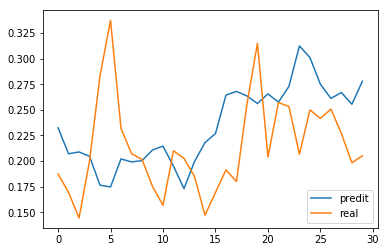

In [39]:
##Mostrem
plt.plot(predis[40], label="predit")
plt.plot(y_daily[n_train+40], label="real")
plt.legend(loc="lower right")
plt.show()

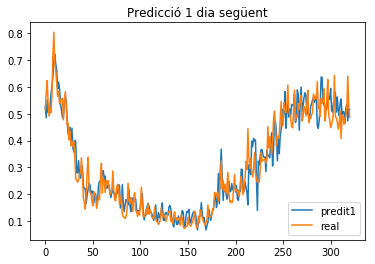

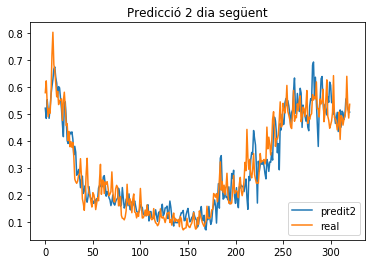

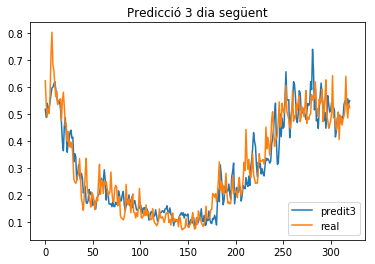

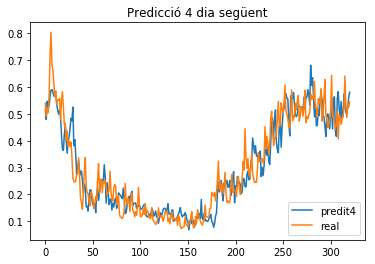

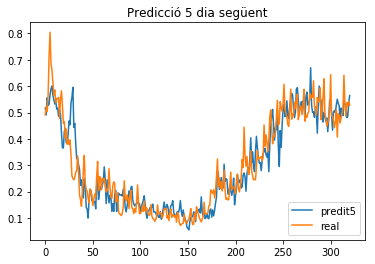

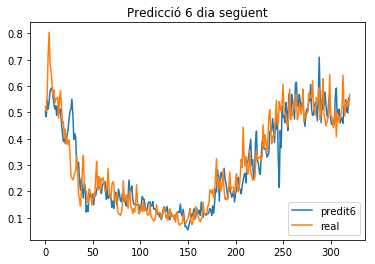

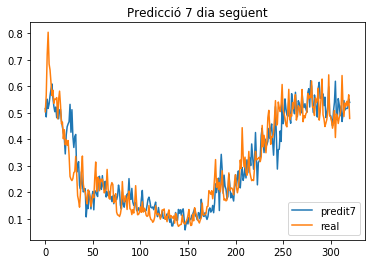

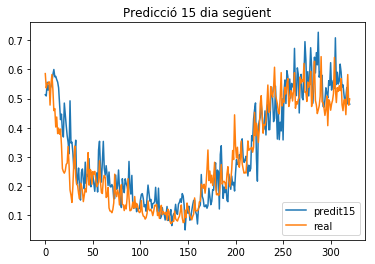

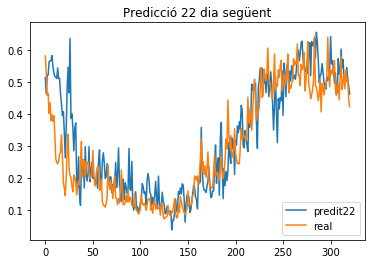

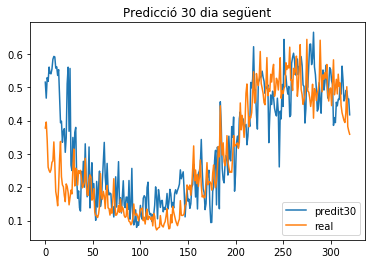

In [43]:
##Mostrem
plt.plot(llista_p0, label="predit1")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 1 dia següent")
plt.show()

plt.plot(llista_p1, label="predit2")
plt.plot(y_daily[n_train:lenght,1], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 2 dia següent")
plt.show()


plt.plot(llista_p2, label="predit3")
plt.plot(y_daily[n_train:lenght,2], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 3 dia següent")
plt.show()

plt.plot(llista_p3, label="predit4")
plt.plot(y_daily[n_train:lenght,3], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 4 dia següent")
plt.show()

plt.plot(llista_p4, label="predit5")
plt.plot(y_daily[n_train:lenght,4], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 5 dia següent")
plt.show()

plt.plot(llista_p5, label="predit6")
plt.plot(y_daily[n_train:lenght,5], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 6 dia següent")
plt.show()

plt.plot(llista_p6, label="predit7")
plt.plot(y_daily[n_train:lenght,6], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 7 dia següent")
plt.show()

plt.plot(llista_p14, label="predit15")
plt.plot(y_daily[n_train:lenght,14], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 15 dia següent")
plt.show()

plt.plot(llista_p21, label="predit22")
plt.plot(y_daily[n_train:lenght,21], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 22 dia següent")
plt.show()

plt.plot(llista_p29, label="predit30")
plt.plot(y_daily[n_train:lenght,29], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 30 dia següent")
plt.show()